Chris S. Castañeda-Barajas

Data Science 450: Deriving Knowledge from Data at Scale

August 5, 2016

# Assignment 5: Support Vector Machines

## Question 1
Using what you have learnt in the lecture, search for additional resources related to the following two approaches.
- Two-class Support Vector Machine
- Two-class Locally-Deep Support Vector Machine (MSR)

    Read - http://research.microsoft.com/en-us/um/people/manik/pubs/Jose13.pdf 
  
Explain what’s the differences between the two algorithms, and provide examples of when you will prefer to use one over the other.

## Question 2
For this exercise, we will use the veh-prime.arff file, and support vector machines for
classification.

Notes
- As a first step you will need to modify the .arff file so that the car, noncar classes are re-placed with 1 and -1 respectively.
- Consider use 10 fold cross-validation (this should come up as the default) 

Try various parameters, and explain what you observe.

In [10]:
library(verification)
library(gplots)

In [1]:
getwd()
list.files()

[1] "/Users/chriscastaneda-barajas/Dropbox/UW_DATA_SCIENCE/class-3/assignment5"

[1] "Assignment 5-VF.pdf"                                                   
[2] "DS450_Assignment_5_Support_Vector_Machines.ipynb"                      
[3] "Local_Deep_Kernel_Learning_for_Efficient_Non-linear_SVM_Prediction.pdf"
[4] "SVM Examples.ipynb"                                                    
[5] "veh-prime.arff.arff"                                                   
[6] "veh-prime.csv"

In [2]:
## LOAD DATA
d <- read.csv("veh-prime.csv", stringsAsFactors=TRUE)

In [19]:
d$car[d$CLASS=="car"] <- 1
d$noncar[d$CLASS=="noncar"] <- -1

In [20]:
head(d)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,ellip.h,f29,f30,f31,f32,f33,f34,f35,CLASS,car,noncar
1,0.063,0.16,0.509,-0.967,0.058,0,0.874,0.271,1.307,-0.011,⋯,0.108,-0.003,0.381,-0.314,0.929,0.184,-0.001,noncar,0,-1
2,-0.037,-0.325,-0.626,-0.029,0.121,-0.409,-0.002,-0.835,-0.595,-0.253,⋯,0.152,-0.978,0.157,0.011,-0.254,0.453,-0.621,noncar,0,-1
3,0,1.253,0.833,-0.97,1.516,0.014,-0.378,1.197,0.546,-0.402,⋯,0.01,-0.652,-0.403,-0.151,0,0.049,-0.113,car,1,0
4,-0.743,-0.082,-0.626,0.723,-0.006,0,-0.08,-0.297,0.166,0.311,⋯,-0.099,-0.001,-0.291,1.633,0.686,1.528,0,noncar,0,-1
5,-0.939,-1.054,-0.14,0.036,-0.766,0,-0.272,1.077,5.236,-0.366,⋯,-0.003,0.122,-0.179,-1.449,0.024,-1.698,0.083,noncar,0,-1
6,-0.247,1.618,1.967,-0.484,1.516,0.102,-0.001,0.091,-1.482,0.729,⋯,0.003,-0.841,-0.403,-1.287,-0.033,-1.698,0,noncar,0,-1


In [4]:
dim(d)

[1] 846  37

In [22]:
d.correlated <- cor(d[,c(-37)])

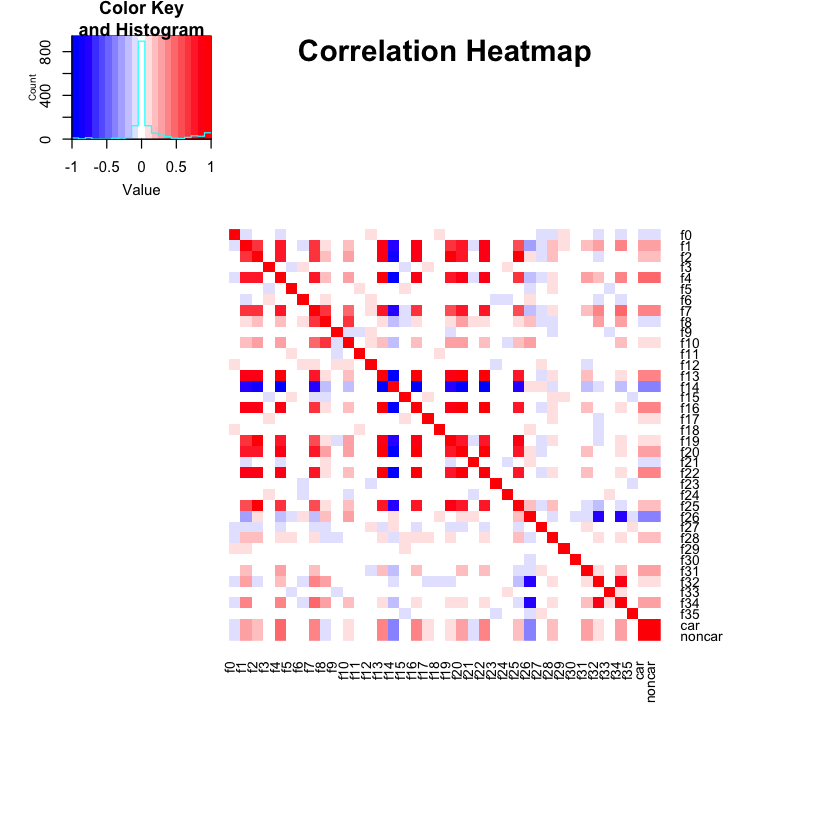

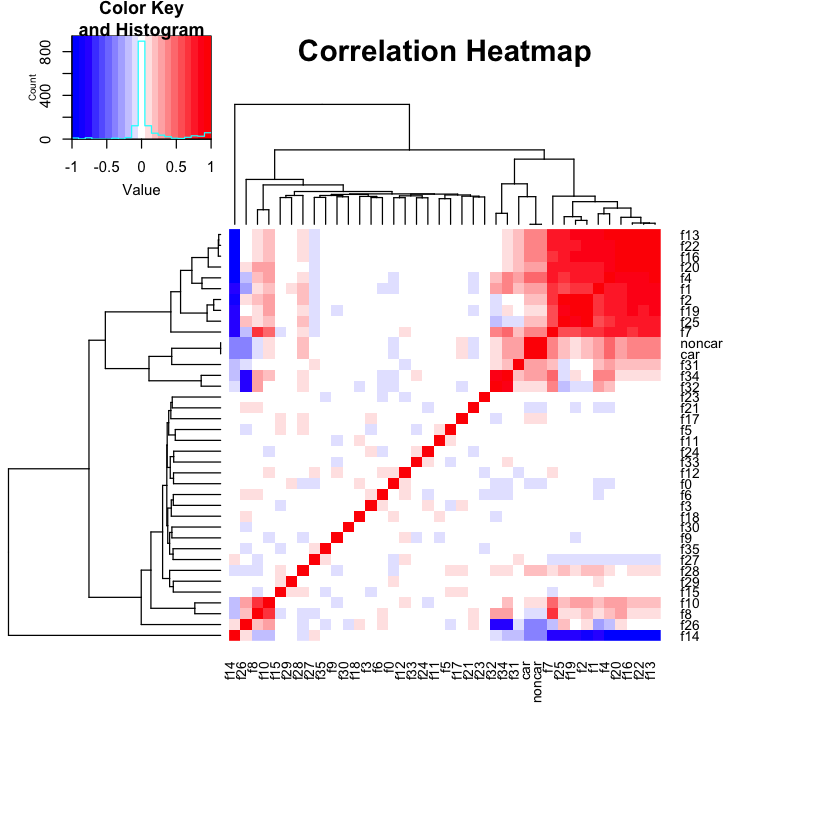

In [26]:

heatmap.2(
  d.correlated, 
  main = "Correlation Heatmap",
  #cellnote = round(d.correlated, 3),  ## could add but heatmap gets a bit overloaded
  #notecol="black", 
  dendrogram = "none",
  Rowv = FALSE,
  Colv = FALSE,
  margins = c(10,9),
  trace="none", 
  col = colorRampPalette(c("blue", "white", "red"))(21)  # blue: -1, white: 0, red: 1
)

heatmap.2(
  d.correlated, 
  main = "Correlation Heatmap",
  #cellnote = round(d.correlated, 3),  ## could add but heatmap gets a bit overloaded
  #notecol="black", 
  dendrogram = "both",
#   Rowv = FALSE,
#   Colv = FALSE,
  margins = c(10,9),
  trace="none", 
  col = colorRampPalette(c("blue", "white", "red"))(21)  # blue: -1, white: 0, red: 1
)